# Testing, Analyzing and Predicting Heart Disease

<table>
<col width="650">
<col width="50">
<tr>
<td><img src="https://www.livelonglyndhurst.com/data1/images/Cardiovascular-Health-1-960x360.jpg
" align="center" style="width:750px;height:260px;"/></td>
<td>
</td>
</tr>
</table>

## Part 1: Understanding the Data

In [1]:
# Importing libraries that will be working with for the intial calculations and visualization
import numpy as np  # Numerical and linear algebra
import pandas as pd # data processing, CSV file (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # Data visualization

import scipy.stats as stats
from scipy.stats import sem, t
from scipy import mean

from IPython.display import Image

In [2]:
# Importing dataset in csv to pandas data frame.
data = pd.read_csv("C:/Users/User/Desktop/Heart Rate/heart.csv")

print('Data Shape Show (On the left side represents the rows, and on the right side represents the columns):\n')
data.shape

Data Shape Show (On the left side represents the rows, and on the right side represents the columns):



(303, 14)

**From the collected data, we can see that there are 303 rows and 14 attributes that will be used for this data analysis.**

In [3]:
#Now, our data is loaded. We're writing the following code to see some information from the data. 
#The purpose here is to see the top ten (or as many as needed) of the rows and all the attributes that are existed from
#this loaded data.

print('The first 10 rows of Data:\n')
data.head(10)

The first 10 rows of Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Here, we would like to see the full mathematical description from our data that we are about to analyze. 

print('Description of the Data:\n')
data.describe()

Description of the Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The data description above illustrates the number of rows of each category the data comes with. Additionally, for each column we get the mean, standard deviation, minimum value of that column, 25, 50 and 75 percentile of each one of the columns and the maximum value of each column as well. For example, the first column (age)  - We can see that the number of columns that are present for the gender is 303, the average age is 54.37 years, standard deviation of 9.1, min or youngest person is of age 29, max or oldest person is of age 77 and the 25, 50, 75 percentiles are 47.5, 55, 61 respectively.** 

In [5]:
#Getting all related column information from the data used. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Information section gives us the types of columns the data consists of. As illustrated, each one of the columns consists of 303 rows, with no null values and with the format type of an integer.**

In [6]:
#Checking for the null values

print('Sum of Null Values of the Data \n')
data.isnull().sum()

Sum of Null Values of the Data 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**As we can see, no null or blank information is presented for this dataset.**

In [7]:
# Extracting brief descriprion of how the columns appear in the dataset

print('Column Names of the Data:\n')
data.columns

Column Names of the Data:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Since we now see how the columns are appear in the data, and it's less clear to understand proper name representation. We would like to rename the columns into more readable way to understand better what each categoty represents.**

## Dataset Columns Feature Explanation 

* **Age:** The person's *Age* in years


* **Sex:** The person's *Sex* (1 = **Male**, 0 = **Female**)


* **CP:** The *Chest Pain* experienced (1: **Typical Angina**, 2: **Atypical Angina**, 3: **Non-Anginal Pain**, 4: **Asymptomatic**)


* **TRESTBPS:** The person's *Resting Blood Pressure* (mmHg on admission to the hospital)


* **CHOL:** The person's *Cholesterol* measurement (in mg/dL)


* **FBS:** The person's *Fasting Blood Sugar* (> 120 mg/dL, 1 = **True**; 0 = **False**)


* **REST-ECG:** *Resting Electrocardiographic* measurement (0 = **Normal**, 1 = **Having ST-T wave Abnormality**, 2 = **Showing probable or definite left ventricular hypertrophy**)


* **THALACH:** The person's *Maximum Heart Rate* achieved


* **EXANG:** *Exercise Induced Angina* (1 = **Yes**; 0 = **No**)


* **OLDPEAK:** *ST Depression Induced* by exercise relative to rest ('ST' relates to positions on the ECG plot)


* **SLOPE:** The *Slope* of the peak exercise ST segment (1: **psloping**, 2: **Flat**, 3: **Downsloping**)


* **CA:** The number of *Major Vessels* (0-3)


* **THAL:** A blood disorder called *Thalassemia* (3 = **Normal**; 6 = **Fixed defect**; 7 = **Reversable Defect**)


* **TARGET:** *Heart Disease* (0 = **No**, 1 = **Yes**)

In [8]:
#Reshaping names for the existing columns for better visualization and understanding.

data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Chest_Pain_Type','trestbps':
                          'Resting_Blood_Pressure','chol':'Serum_Cholesterol','fbs':'Fasting_Blood_Sugar',
                          'restecg':'Rest_ECG','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina',
                          'oldpeak':'St_Depression','slope':'St_Slope','ca':'Number_Major_Vessels',
                          'thal':'Thalassemia','target':'Target'})
data.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG',
       'Max_Heart_Rate', 'Exercise_Induced_Angina', 'St_Depression',
       'St_Slope', 'Number_Major_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

**Checking to make sure the column renaming was done properly.**

In [9]:
# For easier analysis and clean results, listing the actual meanings of each parameter 

data.Target = data.Target.replace({0:'No Heart Disease', 1:'Heart Disease'})
data.Sex = data.Sex.replace({0:'Female', 1:'Male'})
data.Chest_Pain_Type = data.Chest_Pain_Type.replace({1:'Agina Pectoris', 2:'Atypical Agina', 3:'Non-Anginal Pain',
                                                     0:'Absent'})
data.St_Slope = data.St_Slope.replace({1:'Upsloping', 2:'Horizontal', 3:'Downsloping', 0:'Absent'})
data.Fasting_Blood_Sugar = data.Fasting_Blood_Sugar.replace({0:'Greater than 120mg/dL', 1:'Lower than 120mg/dL'})
data.Exercises_Induced_Angina = data.Exercise_Induced_Angina.replace({0:'No', 1:'Yes'})
data.Thalassemia = data.Thalassemia.replace({1:'Normal', 2:'Fixed defect', 3:'Reversable defect', 0:'Absent'})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


Number of people with no heart disease (165), heart disease (138). There are 207 Male and 96 Female



[165, 138]

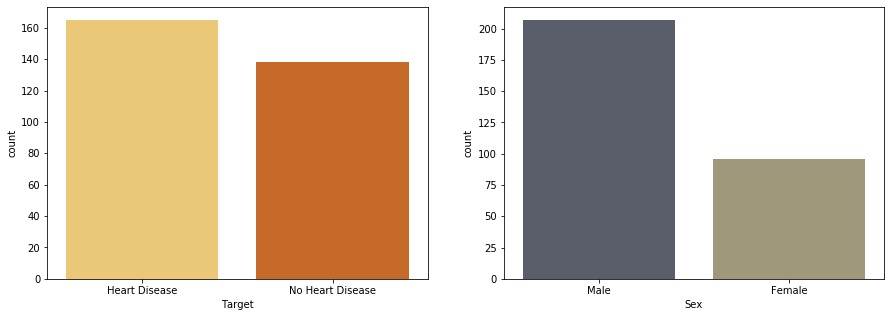

In [10]:
#Getting to know our data with number of males and females and the Target measurement

fig, axs = plt.subplots(ncols=2)
sns.countplot(data=data, x="Target", palette="YlOrBr", ax=axs[0])
sns.countplot(data=data, x="Sex", palette="cividis", ax=axs[1])
plt.gcf().set_size_inches(15, 5)

print('Number of people with no heart disease (165), heart disease (138). There are 207 Male and 96 Female\n')
types = np.unique(data.Target)
count_ = [0,0]
for j in data.Target:
    for idx,val in enumerate(types):
        if val == j: count_[idx] += 1 
count_

**The results are showing that there are 165 people who have heart disease and 138 who don't have. Also, from the right side, the data showing that there been collecting data among 207 men and 96 women.**

Number of male and female with heart disease and without



[96, 207]

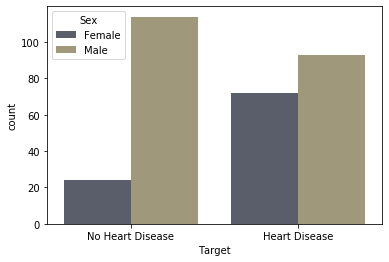

In [11]:
#Ratio between men with heart disease and men without heart disease and same for women

data = data.sort_values('Target', ascending=0)
sns.countplot(data=data, x="Target", hue="Sex", palette="cividis")

print('Number of male and female with heart disease and without\n')
types = np.unique(data.Sex)
count_ = [0,0]
for i in data.Sex:
    for idx,val in enumerate(types):
        if val == i: count_[idx] += 1 
count_

**Here we can see the ratios between male and female with and without having heart disease. From this data we can see that male are in a higher incidence of having heart disease.**

Age distribution for Male and Female and likelihood to get heart disease



Text(0.5, 0, 'Age Distribution (Yellow = Male, Pink = Female)')

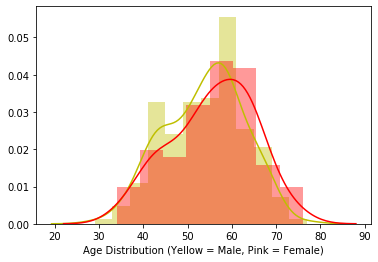

In [12]:
#Looking on age distribution for men and women to see the age where the incident of getting heart disease 
#is most likely happening 

print('Age distribution for Male and Female and likelihood to get heart disease\n')

sns.distplot(data[data.Sex=="Male"].Age, color="y")
sns.distplot(data[data.Sex=="Female"].Age, color="r")
plt.xlabel("Age Distribution (Yellow = Male, Pink = Female)")

**From here we see that the likelihood for getting heart disease for male and female is around age of 60.**

### Correlation coefficient 

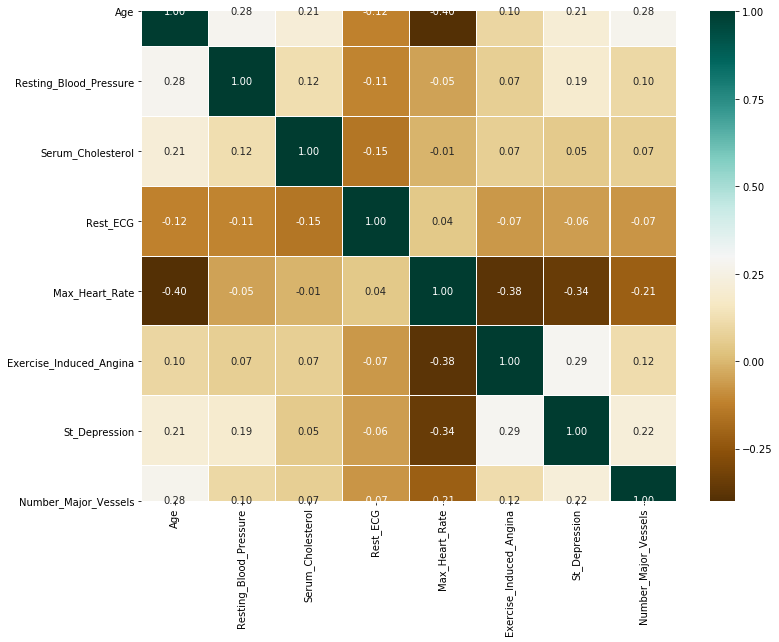

In [13]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.1, 
            fmt= ".2f", 
            cmap="BrBG");

**Mostly used is the Pearson Correlation Coefficient. If we are interested to observe linear relationship between the dataset that we have, Pearson Correlation Coefficient would be the best option. Correlation matrix from our dataset is measured between 1 to -1 where the value is close to 1 or -1 then we can assume there is strong positive correlation or strong negative correlation respectively. While the correlation is close to 0, we can conclude there is a weak correlation between the measurements.**

## Part 2: Data Information and Comparisons

### Heart Disease Terminologies

## (I). Angina

* Type of a chest pain caused by reduced blood flow to the heart. 


* Angina Pectoris or Typical Angina, occurs when the heart must work harder (lasts around 5 mins or less).


* Atypical Angina, is discomfort centered in the chest that is **not** cardiac pain (Myocardial infarction).

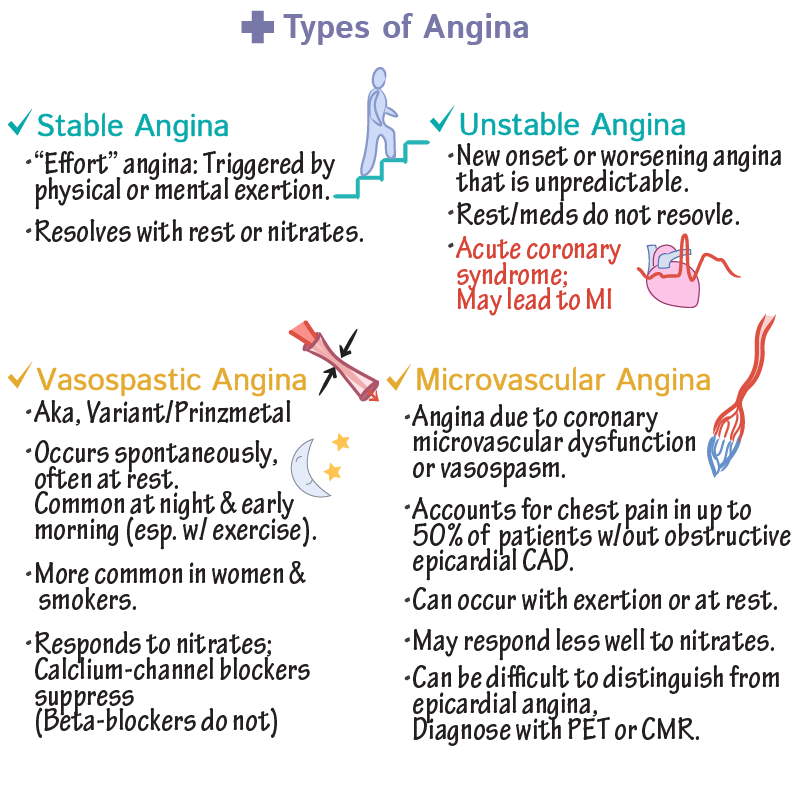

In [14]:
Image (filename="C:/Users/User/Albert Egron Dropbox/Avi Egron/My PC (User-PC)/Desktop/Heart Rate/Angina.png", width=700, height=500)

### (II). Serum cholesterol

**Serum cholesterol includes:**

* LDL level


* HDL level


**NOTE** Having low LDL level and high HDL level is the best way maintaining healthy lifestyle. Healthy serum cholesterol needs to be less than 200 mg/dL. Calculation: HDL + LDL + 0.2 * triglycerides  = total which has to be less than 200 mg/dL.

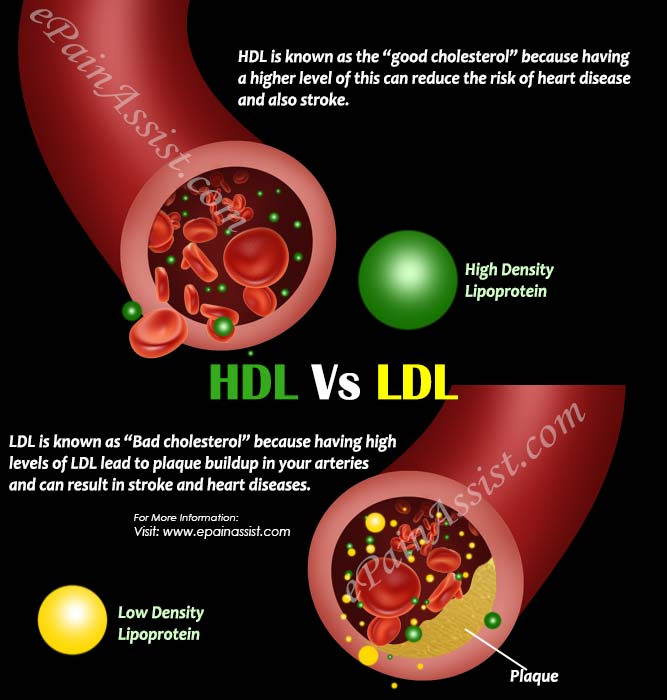

In [15]:
Image (filename="C:/Users/User/Albert Egron Dropbox/Avi Egron/My PC (User-PC)/Desktop/Heart Rate/HDL and LDL.jpg", width=700, height=500)

### (III). ST Segment and ST Depression

The ST Segment represents an electrically neutral area of the complex between QRS Complex (main spike) and T wave (second round peak)

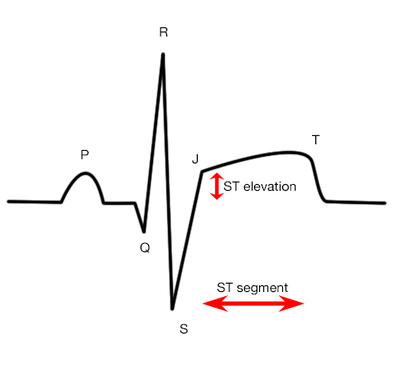

In [16]:
Image (filename="C:/Users/User/Albert Egron Dropbox/Avi Egron/My PC (User-PC)/Desktop/Heart Rate/ST Segment.jpg", width=500, height=500)

### (IV). Thalassemia

Blood disorder that causes the body to make inadequate amount of hemoglobin, the protein that carries oxygen, in which results in large numbers of red blood cells being destroyed.

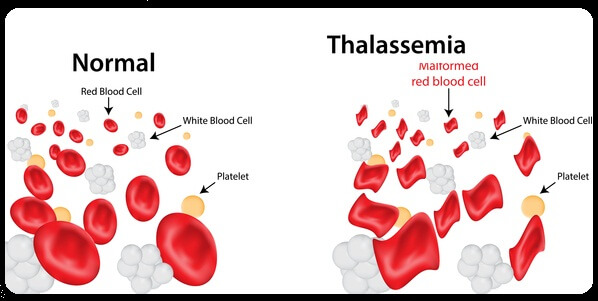

In [17]:
Image (filename="C:/Users/User/Albert Egron Dropbox/Avi Egron/My PC (User-PC)/Desktop/Heart Rate/Thalassemia.jpg", width=800, height=500)

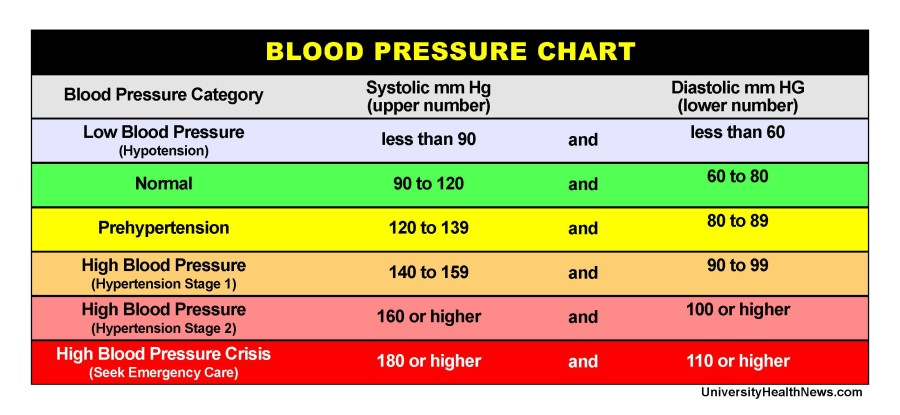

In [18]:
Image (filename="C:/Users/User/Albert Egron Dropbox/Avi Egron/My PC (User-PC)/Desktop/Heart Rate/blood-pressure-chart.jpg", width=800, height=500)

## For comparison: we would like to investigate some causes and their effects on the Target (having or not having a heart condition), to evaluate their role of influencing the severity or easiness of the Target.

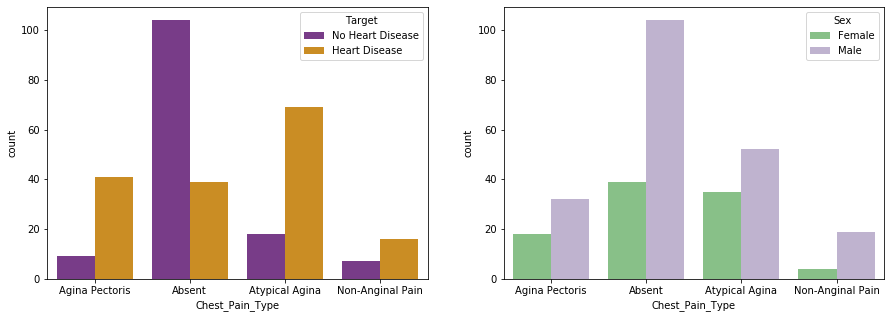

In [19]:
#Chest pain type and Heart Disease association to both genders (Agina Pectoris, Atypical Agina, 
#Non-Anginal Pain or Absent)

fig, axs = plt.subplots(ncols=2)
sns.countplot(x="Chest_Pain_Type", hue="Target", data=data, palette="CMRmap", ax=axs[0])
sns.countplot(x="Chest_Pain_Type", hue="Sex", data=data, palette="Accent", ax=axs[1])
plt.gcf().set_size_inches(15, 5)

**For the first comparison, we wanted to know the target (having or not having) among people who are having different types of Angina. From the absent information, the highest amount of people who are getting heart disease don't come from angina symptoms, but probably from different factors. On the right side, we can clearly see again that men are higher in all the areas of being most vulnerable for getting heart conditions.**

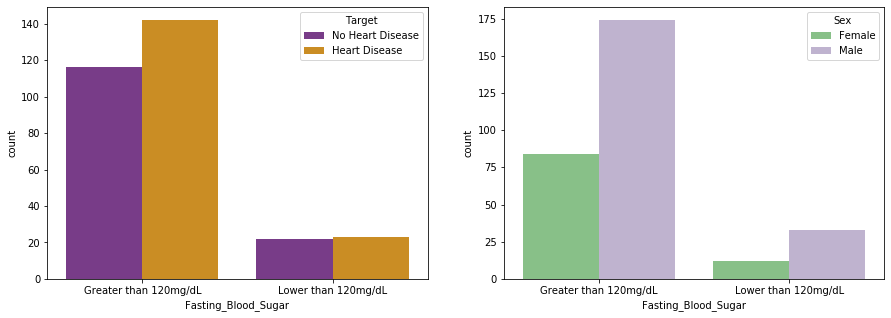

In [20]:
# Fasting blood sugar count between Male and Female 

fig, axs = plt.subplots(ncols=2)
sns.countplot(x="Fasting_Blood_Sugar", hue="Target", data=data, palette="CMRmap", ax=axs[0])
sns.countplot(x="Fasting_Blood_Sugar", hue="Sex", data=data, palette="Accent", ax=axs[1])
plt.gcf().set_size_inches(15, 5)

**Using fasting blood sugar indicating that male are again can get diagnosed with heart conditions with extimated blood sugar count of higher than 120mg/dL.**

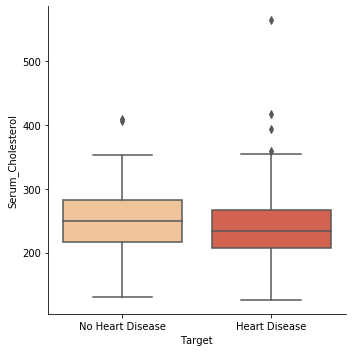

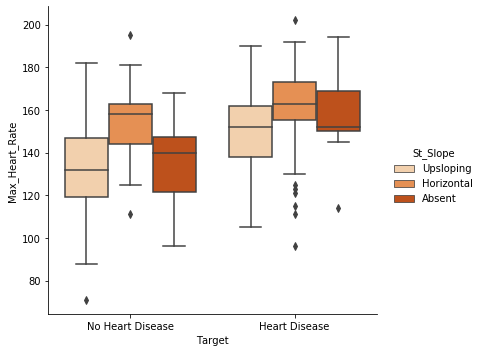

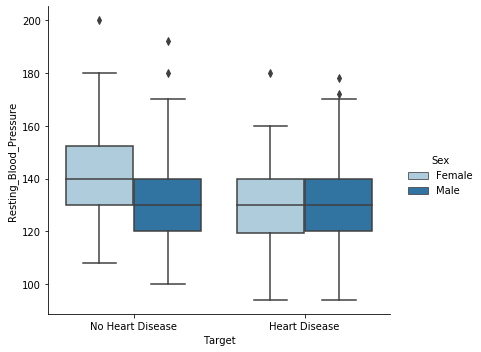

In [21]:
#Creating Box-Plots to associate Serum Cholesterol, Max Heart Rate and Resting Blood Pressure to Heart Disease

sns.catplot(x="Target", y="Serum_Cholesterol", kind="box", data=data, palette="OrRd")
plt.gcf().set_size_inches(5, 5)
sns.catplot(x="Target", y="Max_Heart_Rate", hue="St_Slope", kind="box", data=data, palette="Oranges")
plt.gcf().set_size_inches(7, 5)
sns.catplot(x="Target", y="Resting_Blood_Pressure", hue="Sex", kind="box", data=data, palette="Paired")
plt.gcf().set_size_inches(7, 5)

**For the last comarison, wanted to understand other categories such as Serum Cholesterol, Max Heart Rate and Resting Blood Pressure and their effect to heart disease. As the results, we can see that there are no significant effect of difference of those categories to heart disease in our data.**

# Part 3: Association Rule

**Example 1:**

## Chi-Squared Test Statistic 

The Chi Square statistic compares the tallies or counts of categorical responses between two (or more) independent groups. It is intended to test how likely it is that an observed distribution is due to chance.

**State:** (Chest Pain vs. Target)

**Ho:** No association between chest pain type and having Heart Disease (Null hypothesis)

**Ha:** There is an association between chest pain type and having Heart Disease (Alternative hypothesis)

**Plan:** 
Confidence = 95%, alpha level of significance = 0.05

##### **Conditions:**

  * Assume random sample
  
  
  * Sample size is less than 10% of the total population (people with heart disease)
  
  
  * All expected values are >= 0.05 to reject the null hypothesis

In [22]:
#Targeting Chest Pain and Heart Disease

chestpain_target = pd.crosstab(index=data.Target, columns=data.Chest_Pain_Type, margins=True)
observed = chestpain_target.iloc[0:2,0:4]
chestpain_target

Chest_Pain_Type,Absent,Agina Pectoris,Atypical Agina,Non-Anginal Pain,All
Target,,,,,
Heart Disease,39,41,69,16,165
No Heart Disease,104,9,18,7,138
All,143,50,87,23,303


In [23]:
chi2, p, dof, expected = stats.chi2_contingency(observed=observed)

In [24]:
print("="*10+" Results "+"="*10)
print("Chi-squared Statistic: "+str(chi2))
print("p-value: "+str(p))
print("Degrees of Freedom: "+str(dof))
print("Expected: "+str(expected))
print("="*29)

========== Results ==========
Chi-squared Statistic: 81.68642755194445
p-value: 1.3343043373050064e-17
Degrees of Freedom: 3
Expected: [[77.87128713 27.22772277 47.37623762 12.52475248]
 [65.12871287 22.77227723 39.62376238 10.47524752]]


## **Conclusion**
Besed on the results obtained we see that the **p-value** of **1.33e-17** is less than the assigned significance level alpha = 0.05, we have evidence to reject the null hypotheseis and conclude **there is an association between chest pain type and heart disease**

**Example 2:**

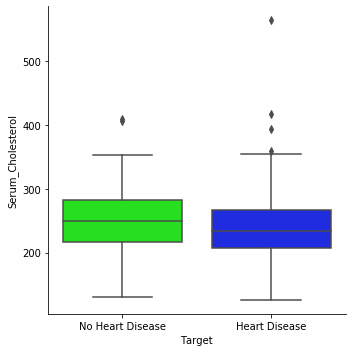

In [25]:
# Relationship between Serum Cholesterol and Heart Disease

sns.catplot(x="Target", y="Serum_Cholesterol", kind="box", data=data, palette="hsv")

As we can see there is not much difference between the serum cholesterol levels of patients with or without heart disease, this is why a test is necessary for us to conclude our findings.

**State:**

**Ho:** No association between Serum Cholesterol and having or not Heart Disease (Null hypothesis)

**Ha:** There is an association between Serum Cholesterol and having or not Heart Disease (Alternative hypothesis)

**Plan:**
Confidence = 95%, alpha level of significance = 0.05

**Conditions:**

* Assume random sample
  
  
  * Sample size is less than 10% of the total population (people with heart disease)
  
  
  * All expected values are >= 0.05 to reject the null hypothesis

In [26]:
#Targeting Serum Cholesterol and Heart Disease

no_disease_sc = data[data.Target=="No Heart Disease"].Serum_Cholesterol
disease_sc = data[data.Target=="Heart Disease"].Serum_Cholesterol
#no_disease_sc
#disease_sc

In [27]:
statistic, p = stats.ttest_ind(no_disease_sc, disease_sc)

In [28]:
print("="*10+" Results "+"="*10)
print("Statistic "+str(statistic))
print("p-value: "+str(p))
print("="*29)

========== Results ==========
Statistic 1.4842450762526977
p-value: 0.13879032695600638


## **Conclusion**

Based on the results obtained the **p-value 0.139 is bigger than our significance level 0.05**, we lack of convincing evidence to reject the Ho, thus conclude there is no enough evidence to support the hypothesis that blood pressure levels leads to heart disease.

**Example 3:**

**The conditional probability for this association rule will test to see Exercise Induced Angina. This will test if a person who just completed his/her exercise, what is the confidence for that person to experience chest pain that is caused by reduced blood flow to the heart due to his/her exercise?**

In [29]:
angina =pd.crosstab(data['Target'],data['Exercise_Induced_Angina'],margins=True)
angina

Exercise_Induced_Angina,0,1,All
Target,,,
Heart Disease,142,23,165
No Heart Disease,62,76,138
All,204,99,303


In [30]:
prob_margin = (99/303) #The marginal probability for excercise induced angina
suppo = (76/303)
confidence = (suppo/prob_margin)
print(confidence)

0.7676767676767676


The confidence that is obtained showing ~77% which means that if the person have angina after exercise (Exercise_Induced_Angina = True) then the probabilty for that person to experience a heart condition is ~77%.

# Part 4: Predictive Modeling 

**Here we are going to compare some of the algorithms together.**

**1. Logistic Regression**

Is a machine learning categorization algorithm that is to predict the possibility of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that has data coded as 1 (considered to be 'yes', or success, etc.) or 0 (which is considered to be no, or failure, etc.). In other words, the logistic regression model predicts the probability of P(Y=1) as a function of using f(x).

**2. k-nearest neighbors (KNN)** 

k-Nearest Neighbors Classifier is a supervised machine learning algorithm or an instance-based classifier that can be used to determine both data classification and data regression problems. The common underlying idea is that the probability for the two occuring examples of the instance space that will be part of the same category or class will get higher with the closeness of the instance. This kind of closeness instance can be explained with a distance or similarity function.

**3. Decision Tree**

This predictive algorithm builds regression or classification models in the form of a tree branch structure. The main function of it is to break down a dataset into smaller and smaller subsets while at the same time an associated decision tree is gradually categorized. The results at the end that is achieved for the decision tree comes with nodes and leaf nodes. A decision node has at least two branches, that each representing values that have been used for the attribute has been tested. Leaf node represents a decision on the numerical target (has a heart disease or don't in our case). Climbing all the way up to the topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

**4. Gaussian Naive Bayes**

Is supervised machine learning classification model that is following the Gaussian normal distribution and also supporting continuous data. This type of machine learing algorithm is commonly used to estimate the mean and the standard deviation from our training data.  

In [31]:
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [32]:
data = pd.read_csv("C:/Users/User/Desktop/Heart Rate/heart.csv", dtype={'sex':float})

In [33]:
# Assigning test and train for our data for predictions

X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
#Assigning the predictive models that will be used for this experiment

Algo = [('LoRe', LogisticRegression()),('KNeCla', KNeighborsClassifier()),('DeTrClas', DecisionTreeClassifier()),
        ('GauNB', GaussianNB())]

In [35]:
mod = []
category = []
for name, algorithm in Algo:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(algorithm, X_train, y_train, cv=kfold, scoring='accuracy')
    mod.append(cv_results)
    category.append(name)
    print(name, cv_results.mean(), cv_results.std())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LoRe 0.8389610389610389 0.08073447998418022
KNeCla 0.6785714285714286 0.11562271363176417
DeTrClas 0.7497835497835498 0.10947845680778032
GauNB 0.806060606060606 0.0730448128630229


**Cross Validation mean (left) and standard deviation (on the right) for each one of the models that we used.** 

### For easier and functional information, we will be creating a function that calculate everything with train and test we used

In [36]:
def results(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        prediction = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, prediction, output_dict=True))
        print("Train Result:\n**********************************************")
        print(f"Score for Accuracy: {accuracy_score(y_train, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Report for Classification:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        prediction = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, prediction, output_dict=True))
        print("Test Result:\n************************************************")        
        print(f"Score for Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Report for Classification:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, prediction)}\n")

**1. Logistic Regression**

In [37]:
LoRe = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.6,max_iter=1000)
LoRe.fit(X_train, y_train)

results(LoRe, X_train, y_train, X_test, y_test, train=True)
results(LoRe, X_train, y_train, X_test, y_test, train=False)

Train Result:
**********************************************
Score for Accuracy: 71.70%
_______________________________________________
Report for Classification:
                   0           1  accuracy   macro avg  weighted avg
precision   0.717647    0.716535  0.716981    0.717091      0.717044
recall      0.628866    0.791304  0.716981    0.710085      0.716981
f1-score    0.670330    0.752066  0.716981    0.711198      0.714668
support    97.000000  115.000000  0.716981  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[61 36]
 [24 91]]

Test Result:
************************************************
Score for Accuracy: 81.32%
_______________________________________________
Report for Classification:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.836735  0.813187   0.811224      0.813747
recall      0.804878   0.820000  0.813187   0.812439      0.813187
f1-score    0.795181   0.828283  0.8131

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


**2. k-nearest neighbors (KNN)**

In [38]:
KNeCla = KNeighborsClassifier(n_neighbors=5)
KNeCla.fit(X_train, y_train)
results(KNeCla, X_train, y_train, X_test, y_test, train=True)
results(KNeCla, X_train, y_train, X_test, y_test, train=False)

Train Result:
**********************************************
Score for Accuracy: 76.89%
_______________________________________________
Report for Classification:
                   0           1  accuracy   macro avg  weighted avg
precision   0.779070    0.761905  0.768868    0.770487      0.769759
recall      0.690722    0.834783  0.768868    0.762752      0.768868
f1-score    0.732240    0.796680  0.768868    0.764460      0.767196
support    97.000000  115.000000  0.768868  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[67 30]
 [19 96]]

Test Result:
************************************************
Score for Accuracy: 65.93%
_______________________________________________
Report for Classification:
                   0          1  accuracy  macro avg  weighted avg
precision   0.631579   0.679245  0.659341   0.655412      0.657769
recall      0.585366   0.720000  0.659341   0.652683      0.659341
f1-score    0.607595   0.699029  0.6593

**3. Decision Tree**

In [39]:
DeTrClas = DecisionTreeClassifier()
DeTrClas.fit(X_train, y_train)
results(DeTrClas, X_train, y_train, X_test, y_test, train=True)
results(DeTrClas, X_train, y_train, X_test, y_test, train=False)

Train Result:
**********************************************
Score for Accuracy: 100.00%
_______________________________________________
Report for Classification:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
************************************************
Score for Accuracy: 74.73%
_______________________________________________
Report for Classification:
                   0          1  accuracy  macro avg  weighted avg
precision   0.695652   0.800000  0.747253   0.747826      0.752986
recall      0.780488   0.720000  0.747253   0.750244      0.747253
f1-score    0.735632   0.757895  0.747253   0.746763      0.747864
support    41.000000  

**4. Gaussian Naive Bayes**

In [40]:
GauNB = GaussianNB()
GauNB.fit(X_train, y_train)
results(GauNB, X_train, y_train, X_test, y_test, train=True)
results(GauNB, X_train, y_train, X_test, y_test, train=False)

Train Result:
**********************************************
Score for Accuracy: 83.02%
_______________________________________________
Report for Classification:
                   0           1  accuracy   macro avg  weighted avg
precision   0.827957    0.831933  0.830189    0.829945      0.830114
recall      0.793814    0.860870  0.830189    0.827342      0.830189
f1-score    0.810526    0.846154  0.830189    0.828340      0.829853
support    97.000000  115.000000  0.830189  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[77 20]
 [16 99]]

Test Result:
************************************************
Score for Accuracy: 83.52%
_______________________________________________
Report for Classification:
                   0          1  accuracy  macro avg  weighted avg
precision   0.782609   0.888889  0.835165   0.835749      0.841004
recall      0.878049   0.800000  0.835165   0.839024      0.835165
f1-score    0.827586   0.842105  0.8351

**We can see that the two models with the highes accuracy results are Decision Tree model and Gaussian Naive Bayes model. From the Decision Tree model we get that the train results accuracy was 100% and the test results accuracy came to be 75%. For the Gaussian Naive Bayes model the train results accuracy was 83% and the test results accuracy came to be 83.5%.**

### Cross Validation

Cross validation is the one of best choice to predict from the unseen data because the model can be trained with the many folds during the training. It is way better choice than a random selection. The most common type of cross-validation is k-fold. It involves splitting data into k-fold's and then testing a model on each. We are going to use cross validation between Decision Tree model and Gaussian Naive Bayes model to understand which one is performing well in K-Fold Cross Validation.

In [41]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = GauNB, X = X_train, y = y_train, cv = 5)
print("Cross validation of Gaussian Naive Bayes model = ",cross_validation)
print("Cross validation of Gaussian Naive Bayes model (in mean) = ",cross_validation.mean())

Cross validation of Gaussian Naive Bayes model =  [0.86046512 0.88372093 0.71428571 0.80952381 0.73809524]
Cross validation of Gaussian Naive Bayes model (in mean) =  0.8012181616832781


In [42]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = DeTrClas, X = X_train, y = y_train, cv = 5)
print("Cross validation of Decision Tree Machine model = ",cross_validation)
print("Cross validation of Decision Tree Machine model (in mean) = ",cross_validation.mean())

Cross validation of Decision Tree Machine model =  [0.76744186 0.74418605 0.71428571 0.73809524 0.73809524]
Cross validation of Decision Tree Machine model (in mean) =  0.740420819490587


# To conclude
### K-Fold Cross validation is performed: 

**From Gaussian Naive Bayes model and Decision Tree Machine model we can conclude that Gaussian Naive Bayes regression is performing well in K-Fold Cross Validation**